In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

# Данные

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
X_train = train.drop('Survived', axis=1)
X_test = test
X_train['is_test'] = False
X_test['is_test'] = True
X = pd.concat([X_train, X_test], axis=0)
X.index = range(len(X))
X.columns = X.columns.str.lower()

In [10]:
X.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,is_test
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


# Подготовка фич

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
passengerid    1309 non-null int64
pclass         1309 non-null int64
name           1309 non-null object
sex            1309 non-null object
age            1046 non-null float64
sibsp          1309 non-null int64
parch          1309 non-null int64
ticket         1309 non-null object
fare           1308 non-null float64
cabin          295 non-null object
embarked       1307 non-null object
is_test        1309 non-null bool
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 113.8+ KB


колонки name, sex, ticket, cabin, embarked не числовые, их необходимо изменить

## колонка sex

In [13]:
X['male'] = (X.sex == 'male').astype(int)

## колонка name

In [15]:
from collections import Counter

In [16]:
one_big_text = " ".join(X.name)
words = one_big_text.replace('/',' / ').split()
most_common = Counter(words).most_common()
most_common[:20]

[('Mr.', 757),
 ('Miss.', 260),
 ('Mrs.', 197),
 ('William', 85),
 ('John', 72),
 ('Master.', 61),
 ('Henry', 47),
 ('Charles', 39),
 ('James', 37),
 ('George', 35),
 ('Joseph', 31),
 ('Thomas', 31),
 ('Edward', 28),
 ('Johan', 22),
 ('Frederick', 20),
 ('Samuel', 20),
 ('Arthur', 20),
 ('Alfred', 18),
 ('Alexander', 17),
 ('Robert', 17)]

In [17]:
Xname = pd.DataFrame()
for col, num in most_common[:10]:
    Xname[col] = X[~X.is_test].name.str.contains(col).astype(int)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf = DecisionTreeClassifier(max_depth=4)

In [20]:
clf.fit(Xname, train.Survived)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
clf.feature_importances_

array([0.57448351, 0.0301036 , 0.36130192, 0.00419181, 0.00975227,
       0.00868202, 0.00840201, 0.00211021, 0.00097265, 0.        ])

In [22]:
Xname.columns

Index(['Mr.', 'Miss.', 'Mrs.', 'William', 'John', 'Master.', 'Henry',
       'Charles', 'James', 'George'],
      dtype='object')

In [23]:
X['is_Mr'] = X.name.str.contains('Mr.').astype(int)
X['is_Mrs'] = X.name.str.contains('Mrs.').astype(int)

## Колонка tickets

In [24]:
one_big_text = " ".join(X.ticket)
words = one_big_text.replace('/',' / ').split()
most_common = Counter(words).most_common()
most_common[:20]

[('/', 144),
 ('PC', 92),
 ('C.A.', 47),
 ('A', 32),
 ('SOTON', 28),
 ('SC', 25),
 ('STON', 22),
 ('O.Q.', 16),
 ('2.', 15),
 ('W.', 14),
 ('C.', 14),
 ('O', 14),
 ('PARIS', 14),
 ('5.', 13),
 ('5', 12),
 ('CA.', 12),
 ('2343', 11),
 ('CA', 10),
 ('C', 10),
 ('F.C.C.', 9)]

In [25]:
Xticket = pd.DataFrame()
for col, num in most_common[:10]:
    Xticket[col] = X[~X.is_test].ticket.str.contains(col).astype(int)

In [26]:
clf.fit(Xticket, train.Survived)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
clf.feature_importances_

array([0.16003679, 0.54731502, 0.03576323, 0.        , 0.        ,
       0.16195071, 0.09493426, 0.        , 0.        , 0.        ])

In [29]:
Xticket.columns

Index(['/', 'PC', 'C.A.', 'A', 'SOTON', 'SC', 'STON', 'O.Q.', '2.', 'W.'], dtype='object')

In [30]:
X['is_PC'] = X.ticket.str.contains('PC').astype(int)
X['is_SC'] = X.ticket.str.contains('SC').astype(int)

## Колонка cabin

In [33]:
X['has_cabin'] = X.cabin.isnull().astype(int)

# Модель

In [35]:
X_train_prep = X[~X.is_test].drop(X_train.columns.str.lower(), axis=1)
X_test_prep = X[X.is_test].drop(X_train.columns.str.lower(), axis=1)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
y = le.fit_transform(train.Survived)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [41]:
%%time
gridsearch.fit(X_train_prep, y)

Wall time: 161 ms


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [42]:
sorted(gridsearch.grid_scores_, key = lambda x: -x.mean_validation_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.47913, std: 0.01808, params: {'max_depth': 2},
 mean: -0.51588, std: 0.02661, params: {'max_depth': 1},
 mean: -0.57057, std: 0.22432, params: {'max_depth': 3},
 mean: -0.64326, std: 0.20739, params: {'max_depth': 4},
 mean: -0.67721, std: 0.22646, params: {'max_depth': 5},
 mean: -0.67721, std: 0.22646, params: {'max_depth': 6},
 mean: -0.67721, std: 0.22646, params: {'max_depth': 7},
 mean: -0.67721, std: 0.22646, params: {'max_depth': 8},
 mean: -0.67721, std: 0.22646, params: {'max_depth': 9}]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


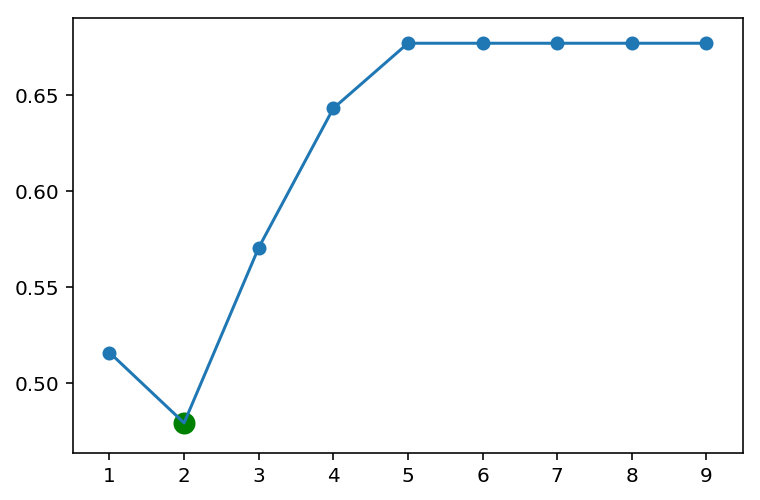

In [43]:
scores = [-x.mean_validation_score for x in gridsearch.grid_scores_]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)

In [44]:
clf_final = DecisionTreeClassifier(max_depth=2)

In [46]:
clf_final.fit(X_train_prep, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Предсказания

In [47]:
y_pred_proba = clf_final.predict_proba(X_test_prep)
y_pred = clf_final.predict(X_test_prep)

## Наиболее важные фичи

''

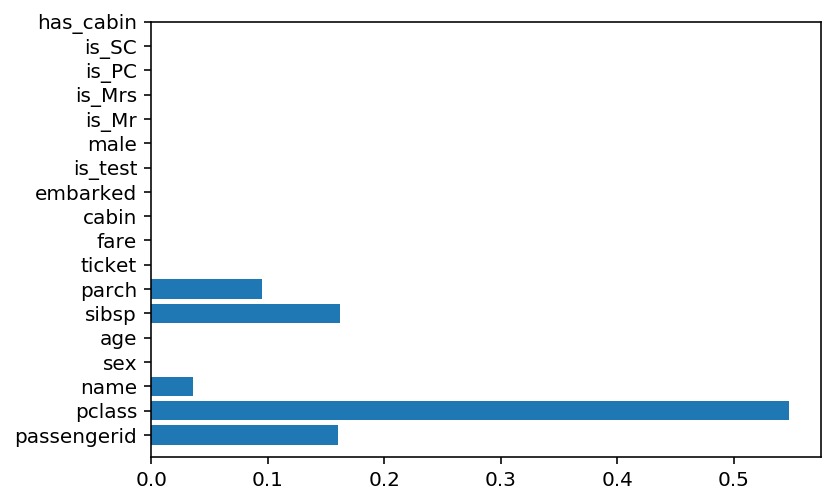

In [48]:
plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)
''

## древо решений

In [49]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [56]:
get_tree_dot_view(clf_final, list(X_train_prep.columns), ['Survived', 'Died'])

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="male <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = Survived", fillcolor="#e5813960"] ;
1 [label="has_cabin <= 0.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = Died", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.116\nsamples = 97\nvalue = [6, 91]\nclass = Died", fillcolor="#399de5ee"] ;
1 -> 2 ;
3 [label="gini = 0.452\nsamples = 217\nvalue = [75, 142]\nclass = Died", fillcolor="#399de578"] ;
1 -> 3 ;
4 [label="has_cabin <= 0.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = Survived", fillcolor="#e58139c4"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.487\nsamples = 107\nvalue = [62, 45]\nclass = Survived", fillcolor="#e5813946"] ;
4 -> 5 ;
6 [label="gini = 0.235\nsamples = 470\nvalue = [406, 64]\nclass = Survived", fillcolor="#e58139d7"] ;
4 -> 6 ;
}
